## Лабораторная работа 8

Кластеризация

Выполнил: 6132-010402D, Рудинская Елизавета Андреевна

0. Найти датасет для кластеризации: для этого берём датасет для мультиклассовой классификации и временно убираем метки классов. 

Эти метки классов пригодятся нам для оценки качества кластеризации. Хотя в реальной жизни такой роскоши скорее всего не будет, однако наличие априорного знания о кластерах позволит нам посчитать несколько дополнительных метрик. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy
from scipy import cluster
from scipy.cluster.hierarchy import dendrogram, linkage

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import (
    adjusted_rand_score,
    adjusted_mutual_info_score,
    homogeneity_score,
    completeness_score,
    v_measure_score,
    silhouette_score,
)
from sklearn.model_selection import GridSearchCV

In [15]:
# Считывание датасета
df = pd.read_csv("test.csv")
df

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [16]:
df.dtypes 

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

### Описание датасета 
id  -   ID

battery_power  - Total energy a battery can store in one time measured in mAh

blue  -  Has bluetooth or not

clock_speed  - speed at which microprocessor executes instructions

dual_sim - Has dual sim support or not

fc   - Front Camera mega pixels

four_g   - Has 4G or not

int_memory  - Internal Memory in Gigabytes

m_dep    - Mobile Depth in cm

mobile_wt - Weight of mobile phone

n_cores   -   Number of cores of processor

pc          -     int64

px_height   -     int64

px_width   -     int64

ram      -       int64

sc_h     -      int64

sc_w      -      int64

talk_time    -    int64

three_g     -  3G -  int64

touch_screen  - int64

wifi    -        int64   
           

1. Выполните иерархическую агломеративную кластеризацию (scipy.cluster.hierarchy), постройте график-дендрограмму (hierarchy.dendrogram)

In [17]:
# датасет без меток класса
temp = df.iloc[0:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
temp

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,7,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,4,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,1,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,2,12,38,832,2509,15,11,6,0,1,0


In [18]:
Z = linkage(temp.iloc[:10], 'single')

In [19]:
labelList = [i for i in range(10)]

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [10.0, 10.0, 25.0, 25.0],
  [17.5, 17.5, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [50.0, 50.0, 65.0, 65.0],
  [57.5, 57.5, 75.0, 75.0],
  [66.25, 66.25, 85.0, 85.0],
  [75.625, 75.625, 95.0, 95.0],
  [26.25, 26.25, 85.3125, 85.3125]],
 'dcoord': [[0.0, 1052.9250305696032, 1052.9250305696032, 0.0],
  [1052.9250305696032, 1338.8632529127087, 1338.8632529127087, 0.0],
  [1338.8632529127087, 1378.8256198664137, 1378.8256198664137, 0.0],
  [0.0, 360.5579565063015, 360.5579565063015, 0.0],
  [360.5579565063015, 528.2062097325248, 528.2062097325248, 0.0],
  [528.2062097325248, 633.6209119023772, 633.6209119023772, 0.0],
  [633.6209119023772, 740.1404258652543, 740.1404258652543, 0.0],
  [740.1404258652543, 947.8503521126107, 947.8503521126107, 0.0],
  [1378.8256198664137,
   1422.7413749518919,
   1422.7413749518919,
   947.8503521126107]],
 'ivl': [4, 2, 9, 7, 8, 5, 1, 0, 3, 6],
 'leaves': [4, 2, 9, 7, 8, 5, 1, 0, 3, 6],
 'color_list': ['C0', 'C0', 'C0

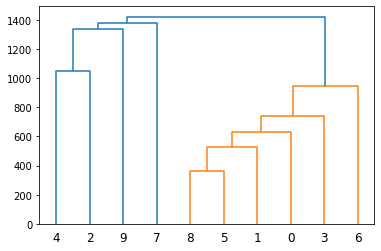

In [20]:
dendrogram(Z, labels=labelList, distance_sort='descending', show_leaf_counts=True )

2. На том же датасете выподните кластеризацию, используя любой другой метод кластеризации (пока с произвольными гиперпараметрами)

In [23]:
model1 = KMeans()

In [24]:
model1.fit(temp.iloc[:1000])

KMeans()

In [25]:
pred1 = model1.labels_

In [26]:
pred1

array([2, 2, 5, 0, 4, 2, 0, 7, 2, 6, 2, 2, 7, 6, 0, 6, 4, 1, 2, 3, 7, 0,
       4, 3, 0, 7, 4, 6, 2, 6, 5, 6, 0, 6, 7, 1, 0, 4, 2, 1, 7, 3, 6, 6,
       6, 7, 1, 5, 1, 3, 3, 6, 0, 1, 0, 4, 0, 7, 1, 2, 2, 2, 1, 4, 4, 1,
       7, 0, 1, 5, 4, 5, 3, 0, 0, 6, 3, 7, 3, 0, 1, 0, 0, 6, 2, 7, 2, 1,
       2, 6, 1, 4, 2, 7, 3, 4, 7, 3, 1, 2, 1, 7, 6, 0, 1, 4, 7, 4, 3, 2,
       2, 0, 4, 2, 0, 2, 2, 4, 0, 7, 6, 2, 3, 4, 4, 7, 0, 3, 0, 7, 6, 5,
       4, 1, 0, 1, 4, 7, 0, 0, 1, 2, 3, 5, 2, 0, 0, 2, 5, 2, 2, 0, 7, 1,
       5, 3, 0, 2, 2, 2, 3, 3, 2, 0, 0, 2, 7, 6, 0, 6, 6, 6, 5, 7, 6, 5,
       1, 7, 1, 4, 7, 6, 1, 7, 3, 0, 5, 7, 6, 6, 7, 7, 6, 0, 4, 1, 0, 5,
       0, 2, 4, 3, 0, 0, 0, 5, 3, 7, 6, 1, 1, 0, 1, 0, 2, 0, 1, 3, 6, 2,
       3, 2, 5, 7, 6, 7, 7, 2, 7, 4, 6, 3, 5, 7, 2, 7, 2, 1, 2, 1, 5, 6,
       6, 3, 1, 2, 5, 2, 5, 4, 2, 7, 6, 2, 0, 0, 5, 0, 4, 7, 2, 5, 1, 2,
       0, 2, 0, 4, 7, 1, 4, 0, 5, 1, 2, 5, 7, 0, 1, 1, 5, 7, 6, 0, 0, 0,
       0, 3, 4, 2, 5, 4, 0, 3, 5, 7, 5, 1, 2, 0, 4,

In [27]:
df1 = pd.DataFrame(pred1)

In [28]:
df1.value_counts()

2    146
0    141
3    137
6    137
1    128
7    108
4    102
5    101
dtype: int64

3. Выполните оптимизацию гиперпараметров кластеризации (либо иерархической модели из п. 1, либо иной модели из п. 2, на ваш выбор; в случае иерархической кластеризации из п. 1 гиперпараметр — пороговое расстояние между центроидами, являющееся границей разбиения на кластеры). Оптимизацию выполните, используя одну из метрик качества кластеризации, для которых нам понадобится информация об исходных метках класса: Adjusted Rand Index (ARI), Adjusted Mutual Information (AMI), Гомогенность, полнота, V-мера.

In [31]:
# Adjusted_Rand_Score
adjusted_rand_score(df['battery_power'][:1000], pred1)

0.00029438127159953597

In [32]:
# Homogeneity_Score
homogeneity_score(df['battery_power'][:1000], pred1)

0.26521805151782896

In [33]:
# Completeness
completeness_score(df['battery_power'][:1000], pred1)

0.8309878061978196

In [35]:
# V-measure
v_measure_score(df['battery_power'][:1000], pred1)

0.40210142145040434

4. Используя алгоритм/модель из п. 2 выполните оптимизацию гиперпараметра количества кластеров, используя "правило локтя" (анализируем график силуэта)

In [36]:
# Подбор гиперпараметров
model1.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [37]:
parameters = {'n_clusters':(2, 3, 4, 5, 6, 7, 8), 'init':('k-means++', 'random'), 'algorithm':('auto', 'full', 'elkan')}
clf = GridSearchCV(model1, parameters)
clf.fit(temp.iloc[:1000], df['battery_power'][:1000])

GridSearchCV(estimator=KMeans(),
             param_grid={'algorithm': ('auto', 'full', 'elkan'),
                         'init': ('k-means++', 'random'),
                         'n_clusters': (2, 3, 4, 5, 6, 7, 8)})

In [38]:
clf.best_params_

{'algorithm': 'auto', 'init': 'random', 'n_clusters': 8}

In [52]:
clf.best_estimator_

KMeans(init='random')

In [39]:
# Использование модели с подобранными гиперпараметрами
model2 = KMeans(n_clusters = 8, init='k-means++', algorithm='full')

In [40]:
model2.fit(temp.iloc[:1000])

KMeans(algorithm='full')

In [41]:
pred2 = model2.labels_

In [42]:
# Adjusted_Rand_Score
adjusted_rand_score(df['battery_power'][:1000], pred2)

7.302265502193365e-06

In [43]:
# Adjusted_Mutual_Info_Score
adjusted_mutual_info_score(df['battery_power'][:1000], pred2)

-6.852697164585483e-05

In [44]:
# Homogeneity_Score
homogeneity_score(df['battery_power'][:1000], pred2)

0.26312204975803083

In [45]:
# Completeness
completeness_score(df['battery_power'][:1000], pred2)

0.8248651537069831

In [46]:
# V-measure
v_measure_score(df['battery_power'][:1000], pred2)

0.3989756668573425

In [50]:
import tqdm

In [53]:
evaluations = []
for n_cluster in tqdm.tqdm(range(2, 101)):
    result = {}
    result["clusters"] = n_cluster
    k_means_model = KMeans(n_clusters=n_cluster)
    k_means_model.fit(temp.iloc[:1000])
    result["silhouette_score"] = silhouette_score(temp.iloc[:1000], k_means_model.labels_)
    evaluations.append(result)


100%|██████████| 99/99 [00:25<00:00,  3.82it/s]


In [54]:
evaluations_df = pd.DataFrame(data=evaluations)

<AxesSubplot:xlabel='clusters'>

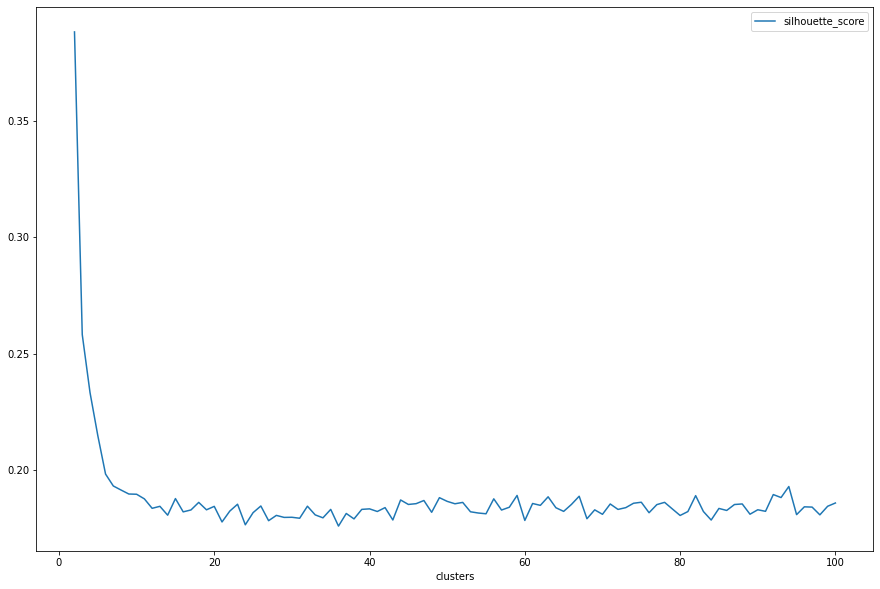

In [55]:
evaluations_df.plot(x="clusters", y="silhouette_score", figsize=(15, 10))

In [65]:
evaluations_df[evaluations_df["clusters"].between(0, 20)]

,clusters,silhouette_score
0,2,0.388401
1,3,0.258182
2,4,0.233247
3,5,0.214789
4,6,0.198199
5,7,0.193077
6,8,0.191320
7,9,0.189618
8,10,0.189520
9,11,0.187535


Из полученных данных (графика и таблицы значений) сложно определить какое количество кластеров стоит использовать, т.к. уменьшение происходит довольно монотонно и нет резкого сгиба. 
Можно предположить, что оптимальным количеством кластеров можно считать значение равное 3

Как считаются нужные нам метрики:

'ARI': metrics.adjusted_rand_score(y, algo.labels_),

'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),

'Homogenity': metrics.homogeneity_score(y, algo.labels_),

'Completeness': metrics.completeness_score(y, algo.labels_),

'V-measure': metrics.v_measure_score(y, algo.labels_),

'Silhouette': metrics.silhouette_score(X, algo.labels_)}))